In [6]:

# installing the library 'transformers' which contains BERT implementation
!pip install transformers
 
# installing the library tensorflow
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
import os
from transformers import pipeline
import matplotlib.pyplot as plt

In [10]:
# Defining a function to call for the whole dataframe
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [5]:
# Reading the indigo tweets data
IndigoTweets=pd.read_csv('Indigo-Tweets.csv', encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head(10)

(1077, 1)


,Tweets
0,Hackers galore Also being sued for passed deb...
1,Hackers galore Also being sued for passed deb...
2,London England UK Come rock with ya girl Fri...
3,NewsAlert BengaluruVijaywada Indigo flight 6E...
4,Hackers galore Also being sued for passed debt...
5,Just Because You Are available at denim tiedy...
6,Why do you start boarding when your aircraft i...
7,BengaluruVijaywada Indigo flight 6E7204 skids ...
8,I love you indigo jael maybe we can make i so...
9,IndigoampSpiceJet Extend to T2


In [8]:
# Downloading the sentiment analysis model
SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [9]:

# Calling the sentiment analysis function for 3 sentences
SentimentClassifier(["I hope we get all these concepts! Its killing the neurons of our brain",
                     "We had a nice experience in this trip",
                     "Houston we have a problem"
                     ])

[{'label': 'NEGATIVE', 'score': 0.9997034668922424},
 {'label': 'POSITIVE', 'score': 0.9998235106468201},
 {'label': 'NEGATIVE', 'score': 0.9944382905960083}]

In [11]:
# Calling the function
FunctionBERTSentiment(inpText="Houston we have a problem")

'NEGATIVE'

In [12]:

# Calling BERT based sentiment score function for every tweet
IndigoTweets['Sentiment']=IndigoTweets['Tweets'].apply(FunctionBERTSentiment)
IndigoTweets.head(10)

,Tweets,Sentiment
0,Hackers galore Also being sued for passed deb...,NEGATIVE
1,Hackers galore Also being sued for passed deb...,NEGATIVE
2,London England UK Come rock with ya girl Fri...,POSITIVE
3,NewsAlert BengaluruVijaywada Indigo flight 6E...,NEGATIVE
4,Hackers galore Also being sued for passed debt...,NEGATIVE
5,Just Because You Are available at denim tiedy...,NEGATIVE
6,Why do you start boarding when your aircraft i...,NEGATIVE
7,BengaluruVijaywada Indigo flight 6E7204 skids ...,NEGATIVE
8,I love you indigo jael maybe we can make i so...,POSITIVE
9,IndigoampSpiceJet Extend to T2,NEGATIVE


<Axes: >

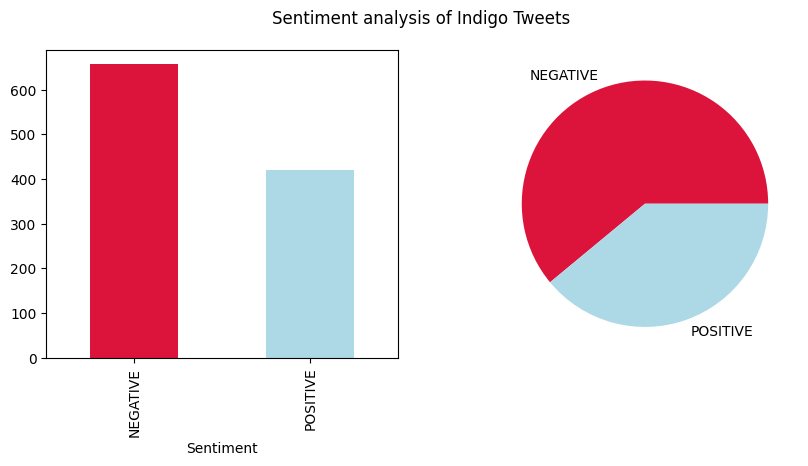

In [14]:
# Visualizing the overall sentiment distribution

fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Indigo Tweets")
 
# Grouping the data
GroupedData=IndigoTweets.groupby('Sentiment').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue'])